In [1]:
import arviz as az
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.
Sampling: [y]


Output()

AttributeError: 'DataArray' object has no attribute 'flatten'

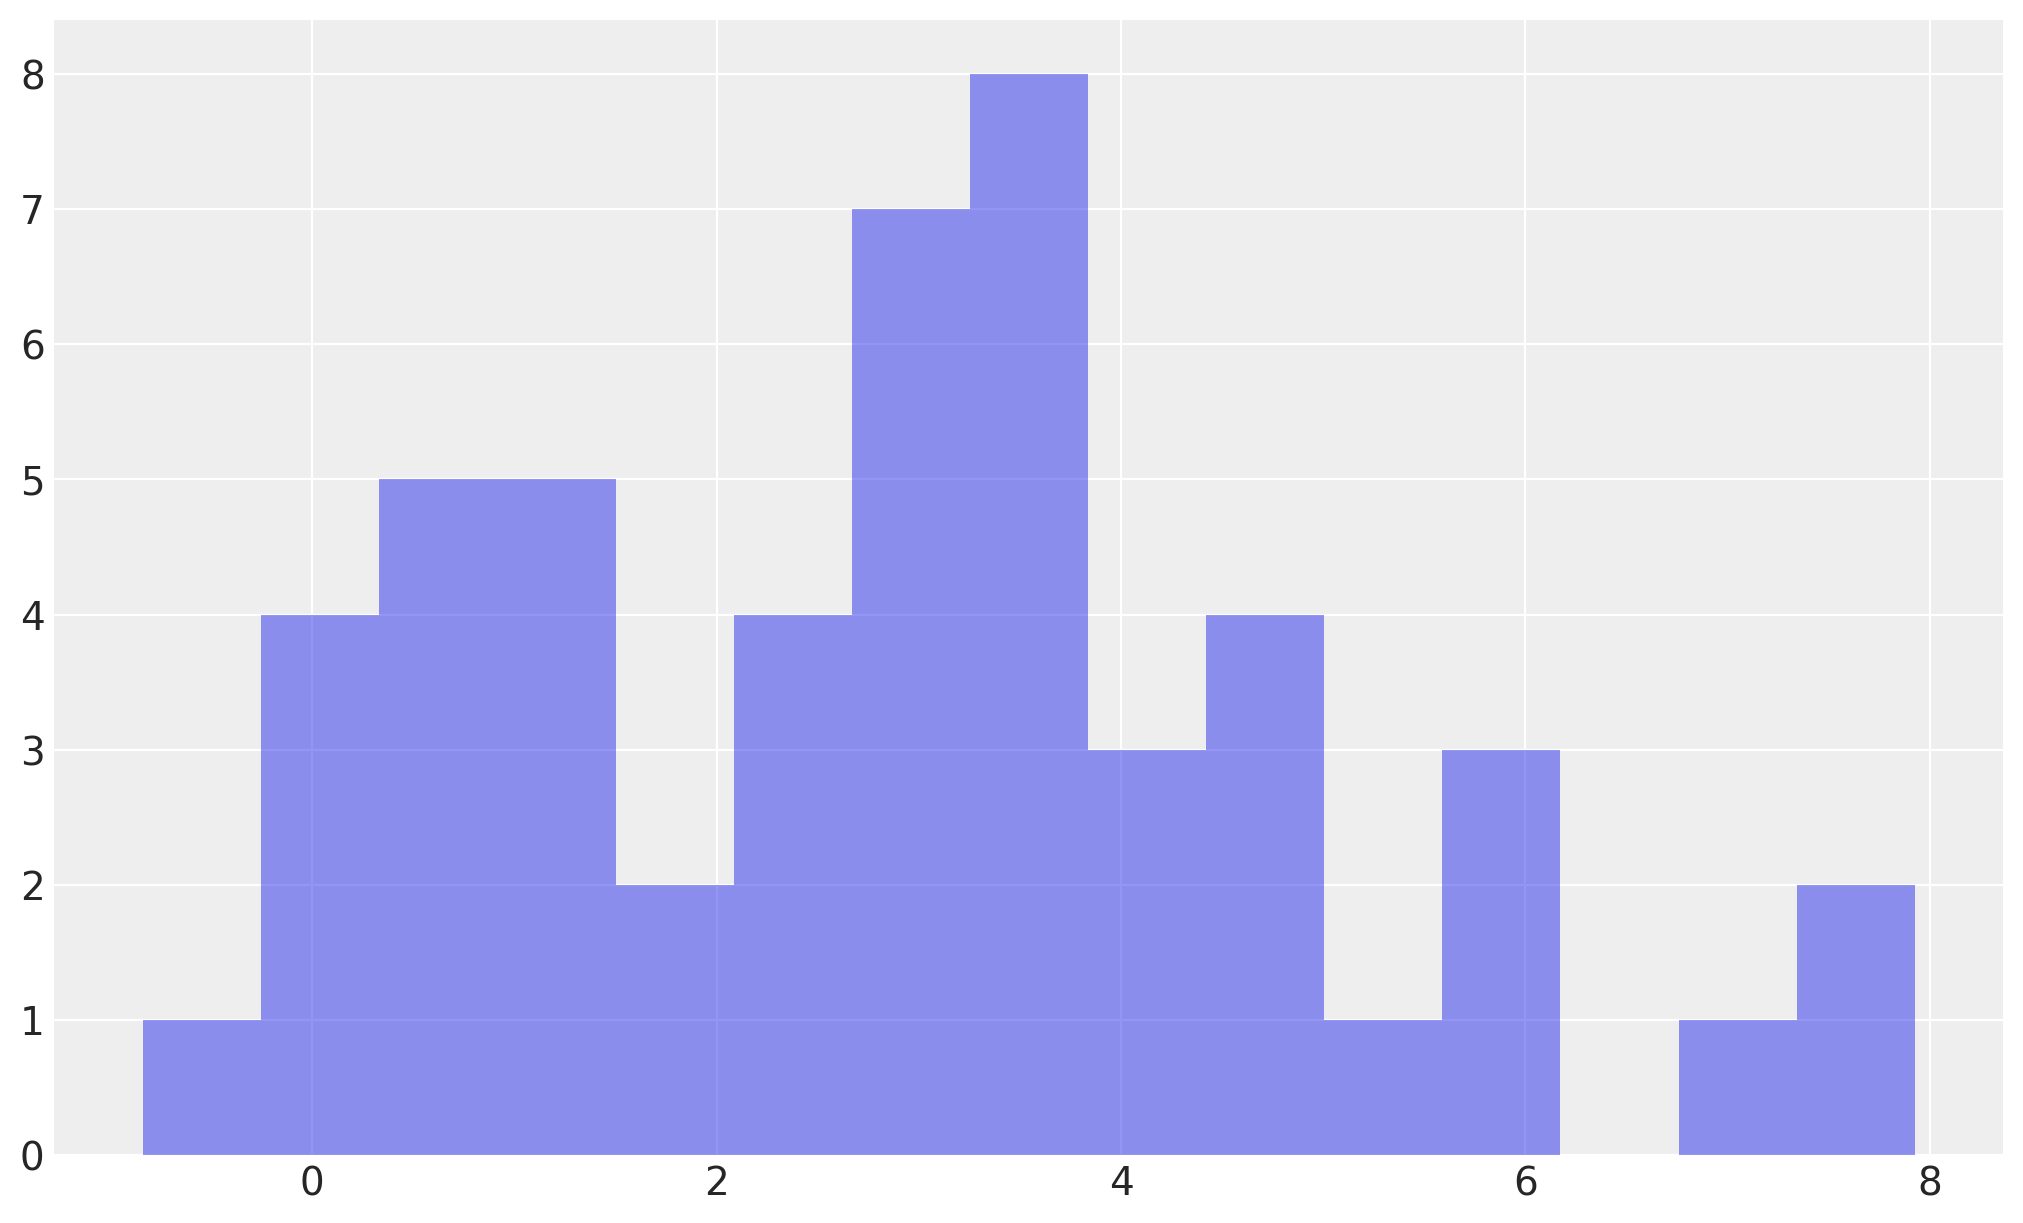

In [7]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(42)
true_mu = 3.0  # True mean
true_sigma = 2.0  # True standard deviation

# Generate data from a normal distribution
observed_data = np.random.normal(true_mu, true_sigma, size=100)

# Step 2: Define the PyMC model
with pm.Model() as model:
    # Priors for unknown parameters
    mu = pm.Normal("mu", mu=0, sigma=10)  # Prior for the mean
    sigma = pm.HalfNormal("sigma", sigma=10)  # Prior for the standard deviation

    # Likelihood (observed data is normally distributed)
    likelihood = pm.Normal("y", mu=mu, sigma=sigma, observed=observed_data)

    # Step 3: Train the model (inference)
    trace = pm.sample(2000, return_inferencedata=True)

# Step 4: Test on unseen data
# Let's generate some unseen test data
test_data = np.random.normal(true_mu, true_sigma, size=50)

# Sample from the posterior predictive distribution
with model:
    posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["y"], random_seed=42)

# Extract predictions from posterior predictive samples for the observed variable 'y'
# posterior_predictive_samples = posterior_predictive["y"]
posterior_predictive_samples = posterior_predictive.posterior_predictive["y"]

# Visualize the results
plt.figure(figsize=(10, 6))
plt.hist(test_data, bins=15, alpha=0.5, label="Unseen test data")
plt.hist(np.random.choice(posterior_predictive_samples.flatten(), size=50), bins=15, alpha=0.5, label="Predicted distribution")
plt.legend()
plt.title("Comparison of Unseen Data vs Model Predictions")
plt.show()

# Print posterior mean and standard deviation
posterior_mu = trace.posterior["mu"].mean().item()
posterior_sigma = trace.posterior["sigma"].mean().item()

print(f"Posterior mean (mu): {posterior_mu}")
print(f"Posterior standard deviation (sigma): {posterior_sigma}")


In [6]:
posterior_predictive.posterior_predictive["y"]

<xarray.DataArray 'y' (chain: 4, draw: 2000, y_dim_2: 100)> Size: 6MB
array([[[ 3.34399553,  3.69745334,  2.60867115, ...,  1.1491688 ,
          5.01913945,  4.19660126],
        [ 4.09017599,  4.15657089,  1.91409047, ...,  5.07698585,
          3.11788309,  6.71298915],
        [ 2.15343362,  4.57764091,  1.57414223, ...,  2.55236605,
          3.02484875, -0.34169334],
        ...,
        [ 3.07177044,  3.58679519,  4.20751432, ...,  7.71997103,
          2.50526205,  3.60691153],
        [ 4.17165534,  2.93399688,  4.26348623, ...,  1.72353271,
          3.33419499,  2.26920884],
        [ 3.13691399,  0.58142055,  3.29067336, ...,  4.87718398,
          4.74799214,  6.66640651]],

       [[ 1.79704226,  5.30499242,  1.59535841, ...,  3.27115942,
          1.97604312,  7.46670162],
        [ 1.65115285,  5.53555118,  2.94759156, ...,  2.14365708,
          5.4487465 ,  1.73193898],
        [-0.33313948,  0.33414873,  3.92312102, ...,  1.73783123,
          4.47208791,  1.74523373],
...
        [-0.11573785,  2.74934641,  1.61525431, ...,  3.7280193 ,
          2.63294047,  0.86621285],
        [ 1.55054746,  0.60929185,  4.70284492, ...,  0.90656916,
          1.35562626,  0.81306514],
        [ 5.14701303,  4.39335323,  4.47846065, ...,  0.5949466 ,
          3.04636444,  3.18821669]],

       [[ 1.34610666,  4.0826473 ,  0.74054122, ...,  1.94040569,
          8.77238018,  0.74087112],
        [-2.68728932,  2.91743232, -0.2298051 , ...,  2.70273578,
          6.16646582,  4.2867281 ],
        [ 1.87589838,  1.65794707,  3.06260638, ...,  4.83767381,
         -0.12445129,  6.22912533],
        ...,
        [ 5.52002523,  7.36318338, -0.86146973, ...,  3.16551008,
          2.08713442,  1.1808804 ],
        [ 2.10541254, -0.58878679,  2.40610187, ...,  3.42008873,
          6.32946734, -0.62636789],
        [-0.76352081,  3.59877224,  3.95680769, ...,  1.24533173,
          0.63269548,  4.12211751]]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 16kB 0 1 2 3 4 5 6 ... 1994 1995 1996 1997 1998 1999
  * y_dim_2  (y_dim_2) int64 800B 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99

In [10]:
posterior_predictive_samples

<xarray.DataArray 'y' (chain: 4, draw: 2000, y_dim_2: 100)> Size: 6MB
array([[[ 3.31470372,  3.66474005,  2.58649732, ...,  1.141123  ,
          4.97363218,  4.15905619],
        [ 4.33535221,  4.39218471,  2.47267345, ...,  5.18003858,
          3.50309202,  6.58041947],
        [ 1.98930165,  4.42201341,  1.40797802, ...,  2.38963359,
          2.86377383, -0.51457859],
        ...,
        [ 3.19885444,  3.78584692,  4.49330316, ...,  8.49657815,
          2.55318417,  3.80877425],
        [ 3.8477169 ,  2.78596214,  3.9264962 , ...,  1.74753666,
          3.12928161,  2.21565791],
        [ 3.18692276,  1.18174112,  3.30757087, ...,  4.55243495,
          4.45106387,  5.956358  ]],

       [[ 1.63025866,  4.60953152,  1.45897025, ...,  2.88221409,
          1.7822826 ,  6.44545314],
        [ 1.84380526,  5.87189418,  3.18820148, ...,  2.35452807,
          5.78187844,  1.92757981],
        [-0.11272138,  0.48464449,  3.69754338, ...,  1.74124097,
          4.18898632,  1.74786779],
...
        [-0.20130851,  2.27790213,  1.29655116, ...,  3.12476596,
          2.17717391,  0.64839168],
        [ 1.86787288,  0.85018222,  5.27615396, ...,  1.17160006,
          1.65712302,  1.070503  ],
        [ 5.32842   ,  4.58785265,  4.6714816 , ...,  0.85543128,
          3.26426352,  3.40365153]],

       [[ 1.21723968,  3.90320126,  0.62286681, ...,  1.80055438,
          8.50625453,  0.62319062],
        [-3.21050378,  3.30349314, -0.35433256, ...,  3.05396556,
          7.07962969,  4.89493498],
        [ 2.14821501,  1.95248359,  3.21393946, ...,  4.80804075,
          0.35179875,  6.05763535],
        ...,
        [ 5.0174653 ,  6.64739265, -0.62576894, ...,  2.93533868,
          1.98171786,  1.18030633],
        [ 1.87802205, -0.94708052,  2.19332099, ...,  3.2565745 ,
          6.30731126, -0.98648757],
        [-0.93128248,  3.50654474,  3.87077966, ...,  1.11235384,
          0.48910963,  4.03895187]]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 16kB 0 1 2 3 4 5 6 ... 1994 1995 1996 1997 1998 1999
  * y_dim_2  (y_dim_2) int64 800B 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99